# Introduction to scientific Python

## Numpy

*Exercise difficulty rating:*  
*[1]* easy. ~1 min  
*[2]* medium. ~2-3 minutes  
*[3]* difficult. Suitable for a standalone project. 

Numpy is imported and aliased to np by convention

In [0]:
import numpy as np

### Array creation

The basic data structure provided by Numpy is the ndarray (n-dimensional array). Each array can store items of the same datatype (e.g. integers, floats, etc.).
Arrays can be created in a number of ways:

- from a Python iterable (usually a list)

In [0]:
a = np.array([0, 1, 2]) # a rank 1 array of integers

- using arange (similar to Python's builtin range but returns an array):

In [0]:
a = np.arange(start=0., stop=1., step=.1) # a rank 1 array of floats 
                                          # note that start is included but stop is not
b = np.arange(10) # a rank 1 array of ints from 0 to 9

- using linspace and logspace

In [0]:
a = np.linspace(start=0, stop=5, num=10) # a rank 1 array of 10 evenly-spaced floats between 0 and 5
                                         # this can be thought of as a linear axis of a graph with evenly-spaced ticks
b = np.logspace(-6, -1, 6) # same as above but on logarithmic scale

- using built-in helper functions

In [0]:
zeros = np.zeros(5) # rank 1 array of 5 zeros
ones = np.ones(3)   # it's in the name
eye = np.eye(8) # 8x8 identity matrix

### Exercises

- create a set of axes for a graph as Numpy arrays. Let the x axis be **uniformly spaced** from 0 to 60 with scale 1 (i.e. one tick per value) and the y axis be on **log scale** and represent the powers of 10 from 0 to 6 *[1]*.

In [0]:
# CODE HERE

### Array indexing and shapes

Basic array indexing is similar to Python lists. However, arrays can be indexed along multiple dimensions.

In [0]:
a = np.array([[0, 1, 2],
              [3, 4, 5],
              [6, 7, 8]])
print(a[0])    # prints [0, 1, 2]
print(a[0, 0]) # prints 0
print(a[:, 1]) # prints [1, 4, 7]

[0 1 2]
0
[1 4 7]


Here : denotes all elements along the axis. For a 2D array (i.e. a matrix) axis 0 is along rows and axis 1 along columns.

#### Slicing
Arrays support slicing along each axis, which works very similarly to Python lists.

In [0]:
a = np.linspace(0, 9, 10)
print(a[0:5]) # prints [0., 1., 2., 3., 4.]
b = np.array([[0,  1,  2],
              [3,  4,  5],
              [6,  7,  8],
              [9, 10, 11]])
print('-'*12)
print(b[:, 0:2]) # prints [[0,  1]
                 #         [3,  4]
                 #         [6,  7]
                 #         [9, 10]]

[ 0.  1.  2.  3.  4.]
------------
[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]]


#### Boolean indexing
Arrays can also be indexed using boolean values

In [0]:
a = np.arange(10)
print(a[a < 5]) # prints [0, 1, 2, 3, 4]
print(a[a % 2 == 0]) # prints [0, 2, 4, 6, 8]

[0 1 2 3 4]
[0 2 4 6 8]


#### Shapes
The shape of the array is a tuple of size ```(array.ndim)```, where each element is the size of the array along that axis.

In [0]:
a = np.array([0, 1, 2])
print(a.shape) # prints 3
b = np.array([[[0], [1], [2]],
              [[3], [4], [5]],
              [[6], [7], [8]]])
print(b.shape) # prints (3, 3, 1)

(3,)
(3, 3, 1)


The shape of the array can be changed using the reshape method.

In [0]:
a = np.arange(9).reshape((3, 3))
print(a) # prints [[0 1 2]
         #         [3 4 5]
         #         [6 7 8]]

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Note that the total number of elements in the new array has to be equal to the number of elements in the initial array. The code below will throw an error.

In [0]:
try:
    a = np.arange(5).reshape((3, 3))
except ValueError as e:
    print(e)

cannot reshape array of size 5 into shape (3,3)


### Exercises

- get the **first column** and the **third row** of the following array *[1]*.

In [0]:
a = np.array([[23, 324,  21, 116], 
              [ 0,  55, 232, 122],
              [42,  43,  44,  45],
              [178, 67, 567,  55]])

In [0]:
# CODE HERE

- find all numbers divisible by 7 between 0 and 50 *[1]*.

In [0]:
# CODE HERE

### Mathematical operations and broadcasting

#### Basic arithmetics
Numpy arrays support the standard mathematical operations.

In [0]:
a = np.arange(9).reshape(3, 3)
b = np.array([10, 11, 12])
print(a + 1) # operation is performed on the whole array
print('-'*12)
print(a - 5)
print('-'*12)
print(b * 3)
print('-'*12)
print(b / 2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
------------
[[-5 -4 -3]
 [-2 -1  0]
 [ 1  2  3]]
------------
[30 33 36]
------------
[ 5.   5.5  6. ]


#### Broadcasting
Operations involving 2 or more arrays are also possible. However, they must obey the rules of broadcasting.

In [0]:
print(a * a) # multiply each element of a by itself
print('-'*12)
print(a + b) # add b elementwise to every row of a
print('-'*12)
print(a[:, 0] + b) # add b only to the first column of a

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
------------
[[10 12 14]
 [13 15 17]
 [16 18 20]]
------------
[10 14 18]


Notice that in the last 2 examples above we could perform the operations even though the arrays did not have the same shape. This is one of the most powerful features of Numpy that allows for very efficient computations. You can read more about broadcasting [in the official documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and [here](http://cs231n.github.io/python-numpy-tutorial/#numpy-broadcasting).

#### Built-in functions
Numpy has efficient implementations of many standard mathematical and statistical functions.

In [0]:
a = np.random.normal(0, 1, (4, 3)) # np.random.normal creates an array of normally-distributed random numbers
                                   # with given mean and standard deviation (e.g. 0 and 1) and in given shape.
print(np.mean(a)) # a number close to 0
print('-'*12)
print(np.mean(a) == a.mean()) # many functions are also implemented as methods in the ndarray class
print('-'*12)
print(np.std(a)) # close to 1
print('-'*12)
print(np.sum(a))  # Compute sum of all elements
print('-'*12)
print(np.sum(a, axis=0))  # Compute sum of each column
print('-'*12)
print(np.sum(a, axis=1))  # Compute sum of each row

0.0720224742954
------------
True
------------
1.06598236443
------------
0.864269691545
------------
[-0.34320682 -0.20264     1.41011651]
------------
[-2.72025726 -0.36653997 -0.37234616  4.32341309]


### Exercises

- create a **6x6 array** of normally distributed random numbers with **mean 5** and **standard deviation 10**. Print its computed mean and standard deviation *[1]*.

In [0]:
# CODE HERE

- add 5 to every element of the array from the previous exercise *[1]*.

In [0]:
# CODE HERE

- multiply the **third column** of the array from the previous exercise by the given array *[1]*.

In [0]:
b = np.array([0, 1, 0, 1, 0, 1])

In [0]:
# CODE HERE

- create a 7x7 matrix with 7 on the leading diagonal and 0 everywhere else (**note**: you might find the ```eye``` function useful) *[1]*.

In [0]:
# CODE HERE

- the following array represents the spending, in pounds of 4 people over 5 months (rows represent time and columns the individuals).
  Compute the **total spending of person 2**. Compute the **average spending in each month for each person** (**note**: use the ```axis``` argument) *[1]*.

In [0]:
#            person     1        2       3        4      # month
spending = np.array([[450.55, 340.67, 1023.98, 765.30],  # 1
                     [430.46, 315.99,  998.48, 760.78],  # 2
                     [470.30, 320.34, 1013.67, 774.50],  # 3
                     [445.62, 400.60, 1020.20, 799.45],  # 4
                     [432.01, 330.13, 1011.76, 750.91]]) # 5

In [0]:
# CODE

- the *outer product* of two vectors ```u``` and ```v``` can be obtained by multiplying each element of ```u``` by each element of ```v```. Compute the outer product of the given vectors (**note**: use the ```reshape``` function) *[2]*.

In [0]:
v = np.array([1,2,3])
w = np.array([4,5])

In [0]:
# CODE HERE

### Linear algebra

Numpy has extensive support for linear algebra operations.

In [0]:
u = np.array([4, 2, 5]) # a row vector in R^3, shape (3,)
v = np.array([.5, .3, .87])
a = np.array([[3, -2,  1],
              [9,  6, 10],
              [6, -4,  3]]) # a 3x3 matrix
b = np.array([[.25,  .2],
              [4.3,  .1],
              [ 1., .82]]) # a 3x2 matrix

print(u.dot(v)) # the dot product of vectors
print('-'*12)

print(a.dot(u)) # the matrix vector product
print('-'*12)

print(a.dot(b)) # matrix multiplication
print('-'*12)

print(np.linalg.norm(u)) # norm aka magnitude of a vector
print('-'*12)

print(np.outer(u, v)) # uv^T
print('-'*12)

print(np.transpose(b)) # equivalent to b.T
print('-'*12)

print(u.T) # note that this does not turn a row vector into column vector
           # i.e. the shape of u.T is still (3,)
print('-'*12)

print(np.linalg.inv(a)) # find the inverse of a matrix, a^-1
print('-'*12)

print(np.linalg.solve(a, u)) # solve the linear system ax = u for x

6.95
------------
[13 98 31]
------------
[[ -6.85   1.22]
 [ 38.05  10.6 ]
 [-12.7    3.26]]
------------
6.7082039325
------------
[[ 2.    1.2   3.48]
 [ 1.    0.6   1.74]
 [ 2.5   1.5   4.35]]
------------
[[ 0.25  4.3   1.  ]
 [ 0.2   0.1   0.82]]
------------
[4 2 5]
------------
[[ 1.61111111  0.05555556 -0.72222222]
 [ 0.91666667  0.08333333 -0.58333333]
 [-2.         -0.          1.        ]]
------------
[ 2.94444444  0.91666667 -3.        ]


### Exercises

- write a function to compute the Euclidean distance between two vectors. Evaluate it on the given data *[1]*.

In [0]:
u = np.array([.4, .23, .01])
v = np.array([.12, 1.1, .5])

In [0]:
# CODE HERE

- the closed-form solution for the linear regression problem can be written as  
  
 $W = (X^{T}X)^{-1}X^{T}y$  
   
 Compute the weight matrix $W$ for the given data. Check if your weight and bias are close to the true values (2, 5). Compute the estimated values $\hat{y}$ for the test dataset *[2]*.

In [0]:
def f_true(x):
    return 2 * x + 5

def f(x):
    return f_true(x) + np.random.normal(0, 1, xx.shape[0])

xx = np.linspace(-10, 10)
X = np.ones((xx.shape[0], 2))
X[:, 1] = xx
y = f(xx)
test = np.array([-5.5, 1.2, 4.8, 9.])

In [0]:
# CODE HERE

### Vectorized functions and speed

The functions in Numpy, including the mathematical operators are implemented in efficient C code operating on whole arrays. Therfore, it is usually a good idea to avoid element-by-element computations in a ```for``` or ```while``` loop. Functions that operate on whole arrays are referred to as *vectorized*.

In [0]:
# a non-vectorized function
def log_pos_p1(x):
    
    """Compute the natural log + 1 of positive elements in x. 
       Return 0 for elements < 0."""
    
    result = np.zeros_like(x) # create an array of zeros with the same shape and type as x
    for i, e in np.ndenumerate(x): # ndenumerate returns tuples (index, element)
        if e > 0:
            result[i] = np.log(e) + 1
    return result
            
def log_pos_p1_vectorized(x):
    # same as above but faster
    result = np.zeros_like(x)
    result[x > 0] = np.log(x[x > 0]) + 1
    return result

In [0]:
x = np.arange(-1000., 1000.)

In [0]:
%timeit log_pos_p1(x)

2.52 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [0]:
%timeit log_pos_p1_vectorized(x)

18.7 µs ± 398 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [0]:
# check if the results are correct
result_slow = log_pos_p1(x)
result_vectorized = log_pos_p1_vectorized(x)
np.allclose(result_slow, result_vectorized)

True

### Exercises

- the *rectified linear unit* (aka ReLU) is a commonly used activation function in machine learning. It can be computed using the following Python function:
  ```python
     def relu(x):
        result = np.zeros_like(x) # create an array of 0s with the same shape and type as x
        for i, e in np.ndenumerate(x): # ndenumerate returns tuples (index, element)
            if x > 0:
                result[i] = e
        return result
  ```
  Vectorize this function. Evaluate the running time using the ```%timeit``` command on the data below *[2]*.

In [0]:
def relu(x):
    result = np.zeros_like(x) # create an array of 0s with the same shape and type as x
    for i, e in np.ndenumerate(x): # ndenumerate returns tuples (index, element)
        if e > 0:
            result[i] = e
    return result

x = np.arange(-10000., 10000.)

In [0]:
# CODE HERE

- the integral of a function can be numerically aproximated using the *trapezoidal rule*, defined as:  
  $\displaystyle\int_{a}^{b}f(x)dx \approx \frac{h}{2}f(a) + \frac{h}{2}f(b) + h\displaystyle\sum_{i=1}^{n-1}f(a + ih), \space h = \frac{b - a}{n}$  
  Write a vectorized function to integrate a function using the trapezoidal rule. It should accept as arguments the function to integrate, the lower and upper bounds and the number of iterations $n$. **Do not** use an explicit ```for```-loop for the summation. Use your function to intergrate $x^3$ from 0 to 1 using $n=1000$ (the true value of this integral is $\frac{1}{4}$) *[2]*.

In [0]:
def f(x):
    return x ** 3

a = 0
b = 1
n = 1000

In [0]:
# CODE HERE

## Challenges

- Write a function to compute the elements of the Mandelbrot set with given resolution *[3]*. Estimate the area of the computed set *[2]*. Make the function as fast as possible using vectorization *[3]*.

## Matplotlib Visualization

As its name conveys, `matplotlib` is plotting library inspired by the `MATLAB` plotting `API`.<br>
`seaborn` is a wrapper library for `matplotlib`, encapsulating some of the low-level functionalities of it.<br><br>
This is a beginers-level tutorial to `matplotlib` using `seaborn` palettes for "prettifying" the plots. Similar results can be replicated by just using `matplotlib`.

## `inline` mode

When working on an interactive environment, such as `IPython` (and `Jupyter`), there is the option of draw plots without calling the `.show()` method, which is necessary for `script` mode. To do so, use the oneliner below.

In [0]:
# show plots without need of calling `.show()`
%matplotlib inline

In [0]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed
np.random.seed(0)

## Simple Plot

How to plot a 2D plot of two variables $x$ and $y$.<br><br>

**Warning**<br>
The length of the two variables should match, such that `len(x) == len(y)`.

### Single

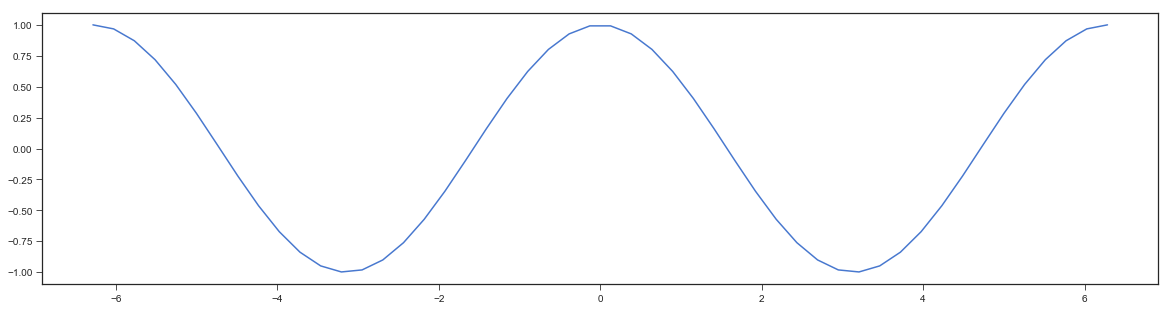

In [0]:
# x-axis variable
x = np.linspace(-2*np.pi, 2*np.pi)
# y-axis variable
y = np.cos(x)

# making sure that the length of the two variables match
assert(len(x) == len(y))
# visualize
plt.plot(x, y);

# WARNING: Don't forget this line in `script` mode
# plt.show()

### Multiple

Plot two functions $f$ and $g$ against the independent variable $x$ **on the same graph**.

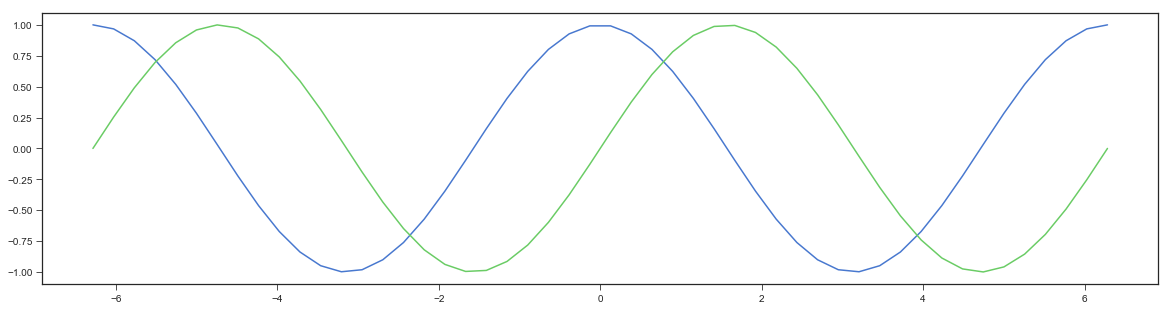

In [0]:
# x-axis variable
x = np.linspace(-2*np.pi, 2*np.pi)
# y-axis variable
y_cos = np.cos(x)
y_sin = np.sin(x)

# visualize
plt.plot(x, y_cos)
plt.plot(x, y_sin);

# WARNING: Don't forget this line in `script` mode
# plt.show()

### Metadata

Provide "metadata" for our plot, such as:
* title
* axes labels
* legend

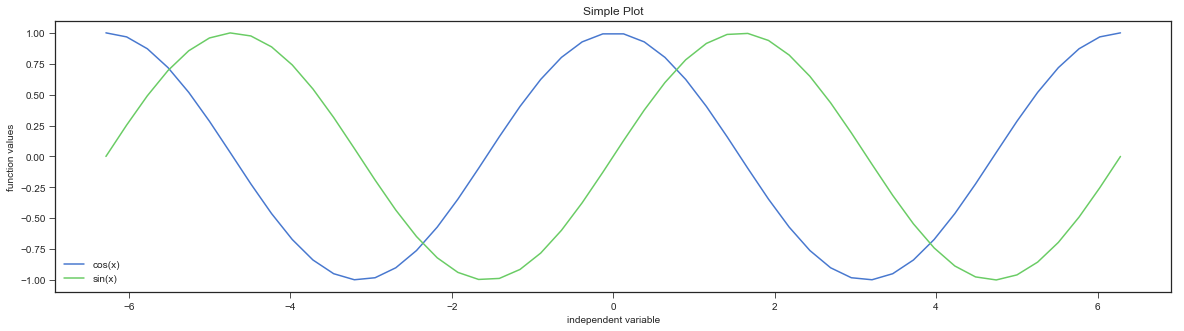

In [0]:
# x-axis variable
x = np.linspace(-2*np.pi, 2*np.pi)
# y-axis variable
y_cos = np.cos(x)
y_sin = np.sin(x)

# visualize
plt.plot(x, y_cos, label="cos(x)") # `label` argument is used in the plot legend to represent this curve
plt.plot(x, y_sin, label="sin(x)")

# meta data
plt.title("Simple Plot")
plt.xlabel("independent variable")
plt.ylabel("function values")
plt.legend();

# WARNING: Don't forget this line in `script` mode
# plt.show()

### Styling

Advanced styling and formating options are available, such as:
* marker style
* line style
* color
* linewidth

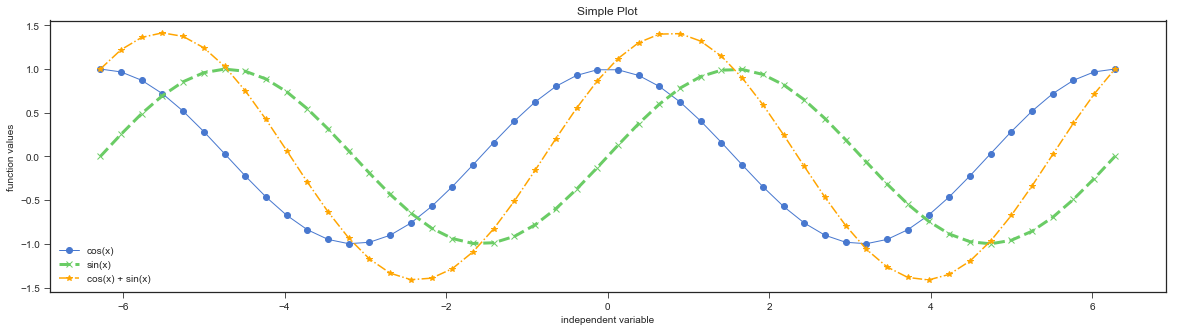

In [0]:
# x-axis variable
x = np.linspace(-2*np.pi, 2*np.pi)
# y-axis variable
y_cos = np.cos(x)
y_sin = np.sin(x)
y_mix = y_cos + y_sin

# visualize
plt.plot(x, y_cos, linestyle="-",  marker="o", label="cos(x)", linewidth=1) 
plt.plot(x, y_sin, linestyle="--", marker="x", label="sin(x)", linewidth=3)
plt.plot(x, y_mix, linestyle="-.", marker="*", label="cos(x) + sin(x)", color='orange')

# meta data
plt.title("Simple Plot")
plt.xlabel("independent variable")
plt.ylabel("function values")
plt.legend();

# WARNING: Don't forget this line in `script` mode
# plt.show()

### Task (Activation Functions Plots)

In neural networks, various activation functions are used, some of which are illustrated below! ![yo](http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png)

**TODO**<br>
Choose 2 activation functions,
* **implement** them (as we did for $cos(x)$ and $sin(x)$ functions)
* **plot** them in the same graph, using `plt.plot`

Make sure you provide a title, axes label and a legend!

Don't forget to put your personal tone to this task and style the plot!!

In [0]:
# CODE HERE

## Histogram

When working with random variables, in a stochastic setting, **histograms** are a very representative way to visualize the random variables probability density functions.<br><br>

**Warning**<br>
Histograms are visualizing the distribution of a **single random variable**, so make sure you notice the difference between:
* `plt.plot(x, y)`
<br>
<br>
* `plt.hist(z)`

### `plt.hist`

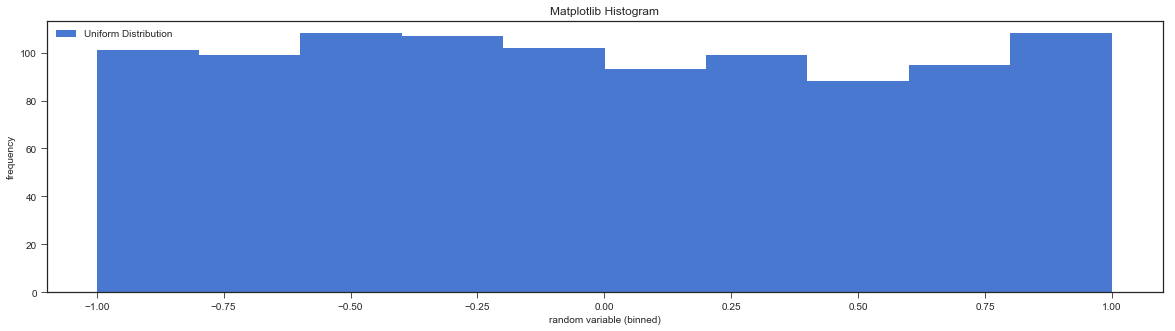

In [0]:
# uniform random variable
u = np.random.uniform(-1, 1, 1000)

# visualize
plt.hist(u, label="Uniform Distribution")

# metadata
plt.title("Matplotlib Histogram")
plt.xlabel("random variable (binned)")
plt.ylabel("frequency")
plt.legend();
# WARNING: Don't forget this line in `script` mode
# plt.show()

### `sns.distplot`

`seaborn` wraps `plt.hist` method and applies also some **KDE** (Kernel Distribution Estimation), providing a better insight into the distribution of the random variable.

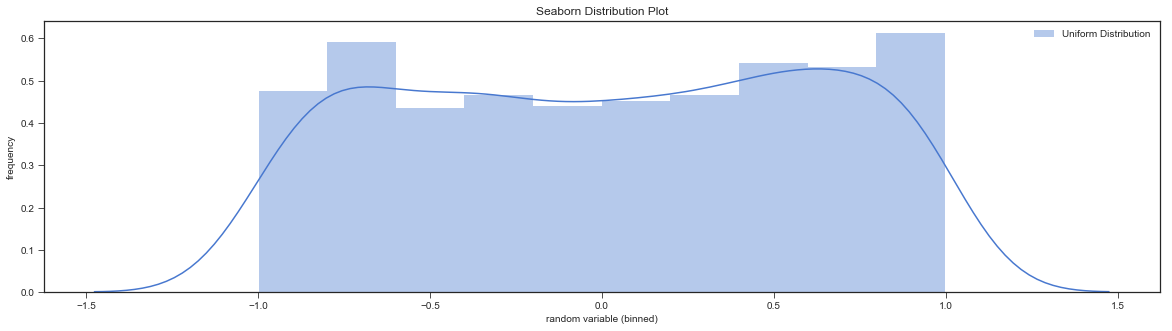

In [0]:
# uniform random variable
u = np.random.uniform(-1, 1, 1000)

# visualize
sns.distplot(u, label="Uniform Distribution")

# metadata
plt.title("Seaborn Distribution Plot")
plt.xlabel("random variable (binned)")
plt.ylabel("frequency")
plt.legend();
# WARNING: Don't forget this line in `script` mode
# plt.show()

### Task (Stochastic Processes Distributions Plots)

We covered only the uniform distribution, but there are many more already implemented in `NumPy`. Generate similar plots for other distributions of your choice.

**TODO**<br>
Choose 2 [distributions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html#distributions),
* **implement** them (as we did for uniform distribution)
* **plot** them in the same graph, using `plt.hist` or `sns.distplot`

Make sure you provide a title, axes label and a legend!

Don't forget to put your personal tone to this task and style the plot!!

In [0]:
# CODE HERE

## SciPy Optimization

In [0]:
# scientific computing library
import numpy as np
# optimization package
from scipy.optimize import minimize

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20.0, 5.0]
sns.set_palette(sns.color_palette("muted"))
sns.set_style("ticks")

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed
np.random.seed(0)

Find **global minimizer** of function $f$:
$$f(x) = x^{2} - 2x + 5sin(x), \quad x \in \mathcal{R}$$

In [0]:
# function definition
def f(x):
    return x**2 - 2*x + 5*np.sin(x)

Minimizer: [-0.77901606]
Message: Optimization terminated successfully.
Success: True


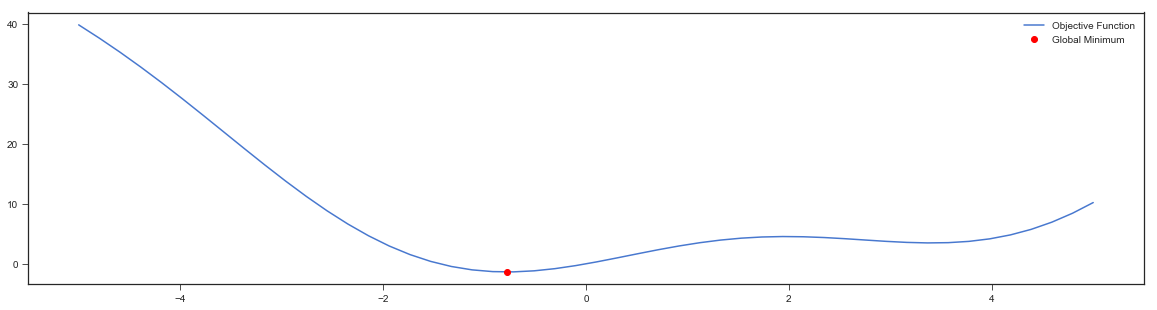

In [0]:
"""
`minimize(fun, x0, method, tol)`:
    
    Parameters
    ----------
    fun: callable
        Objective function
    x0: numpy.ndarray
        Initial guess
    str: string or callable
        Type of solver, consult
            [docs](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.minimize.html)
    tol: float
        Tolerance for termination
   
    Returns
    -------
    result: OptimizeResult
        x: numpy.ndarray
            Minimum
        success: bool
            Status of optomization
        message: string
            Description of cause of termination
"""
result = minimize(fun=f, x0=np.random.randn())
# report
print("Minimizer:", result.x)
print("Message:", result.message)
print("Success:", result.success)

# visualization
t = np.linspace(-5, 5)
plt.plot(t, f(t), label='Objective Function')
plt.plot(result.x, f(result.x), 'ro', label='Global Minimum')
plt.legend();

### Task (Polynomial Optimization)

Convex optimization is a useful tool that can be applied to various objective functions.

**TODO**<br>
Use `scipy.optimize.minimize` function to minimize $f(x) = 2 - 9x + x^2, x \in \mathcal{R}$.

In [0]:
## CODE HERE